## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%pylab 
%matplotlib inline

import pandas as pd
from scipy import stats

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## Checking out the dataset

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Q1: Is the distribution of body temperatures normal?

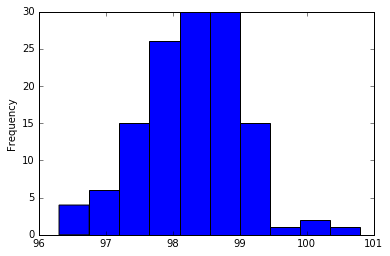

In [5]:
df['temperature'].plot.hist()

In [6]:
stats.kstest(df['temperature'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

We can reject the null that the human temperature is drawn from a normal distribution with >99% confidence.

---

## Q2: Is the true population mean really 98.6 degrees F?

In [7]:
df['temperature'].mean()

98.24923076923078

---

## Q3: At what temperature should we consider someone's temperature to be "abnormal"?

In [8]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [9]:
[98.249231 - (3*0.733183) , 98.249231 + (3*0.733183)]

[96.04968199999999, 100.44878]

---

## Q4: Is there a significant difference between males and females in normal temperature?

In [16]:
stats.ttest_ind(df[df['gender'] == 'M']['temperature'], df[df['gender'] == 'F']['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [21]:
df[df['gender'] == 'M']['temperature'].describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [20]:
df[df['gender'] == 'F']['temperature'].describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

Yes, the average temperature for women is significantly higher than the average male temperature.

---